<a href="https://colab.research.google.com/github/ketanksagar/NASA_Asteroid_Data_Mining/blob/main/NASA_Asteroid_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IE 7275 GROUP NO.72-- NASA ASTEROID CLASSIFICATION


---
--KETAN KSHIRSAGAR

--NAREN MOHAN






##Data Collection

In [ ]:
#Importing essential libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
from google.colab import files
file = files.upload()  #upload file into google colab session
nasa_df = pd.read_csv("nasa.csv")
nasa_df.head()

Saving nasa.csv to nasa.csv


,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [ ]:
nasa_df.shape

(4687, 40)

In [ ]:
list(nasa_df.columns)

['Neo Reference ID',
 'Name',
 'Absolute Magnitude',
 'Est Dia in KM(min)',
 'Est Dia in KM(max)',
 'Est Dia in M(min)',
 'Est Dia in M(max)',
 'Est Dia in Miles(min)',
 'Est Dia in Miles(max)',
 'Est Dia in Feet(min)',
 'Est Dia in Feet(max)',
 'Close Approach Date',
 'Epoch Date Close Approach',
 'Relative Velocity km per sec',
 'Relative Velocity km per hr',
 'Miles per hour',
 'Miss Dist.(Astronomical)',
 'Miss Dist.(lunar)',
 'Miss Dist.(kilometers)',
 'Miss Dist.(miles)',
 'Orbiting Body',
 'Orbit ID',
 'Orbit Determination Date',
 'Orbit Uncertainity',
 'Minimum Orbit Intersection',
 'Jupiter Tisserand Invariant',
 'Epoch Osculation',
 'Eccentricity',
 'Semi Major Axis',
 'Inclination',
 'Asc Node Longitude',
 'Orbital Period',
 'Perihelion Distance',
 'Perihelion Arg',
 'Aphelion Dist',
 'Perihelion Time',
 'Mean Anomaly',
 'Mean Motion',
 'Equinox',
 'Hazardous']

In [ ]:
#Checking for inappropriate values
nasa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [ ]:
# Checking for null values
nasa_df.isnull().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

## Data Exploration and Visualization

### Class difference

In [ ]:
nasa_df.Hazardous.value_counts()

False    3932
True      755
Name: Hazardous, dtype: int64

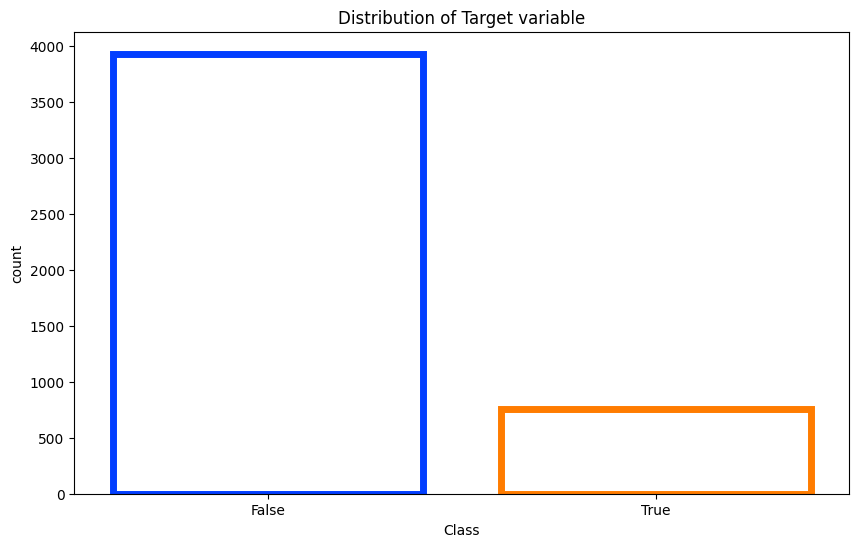

In [ ]:
# Check the Target variable distribution
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data = nasa_df, x ='Hazardous', facecolor=(0, 0, 0, 0),
                   linewidth=5, ax=ax,
                   edgecolor=sns.color_palette("bright", 5),
              palette='bright').set(title = 'Distribution of Target variable',
                                    xlabel= "Class")
plt.show()

The total count of asteroid classes:

*   Non hazardous: 3932
*   Hazardous: 755

Highly imbalanced data (~5:1)

### Checking for Redundant features

<ipython-input-9-889bc978e94b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = nasa_df.corr()


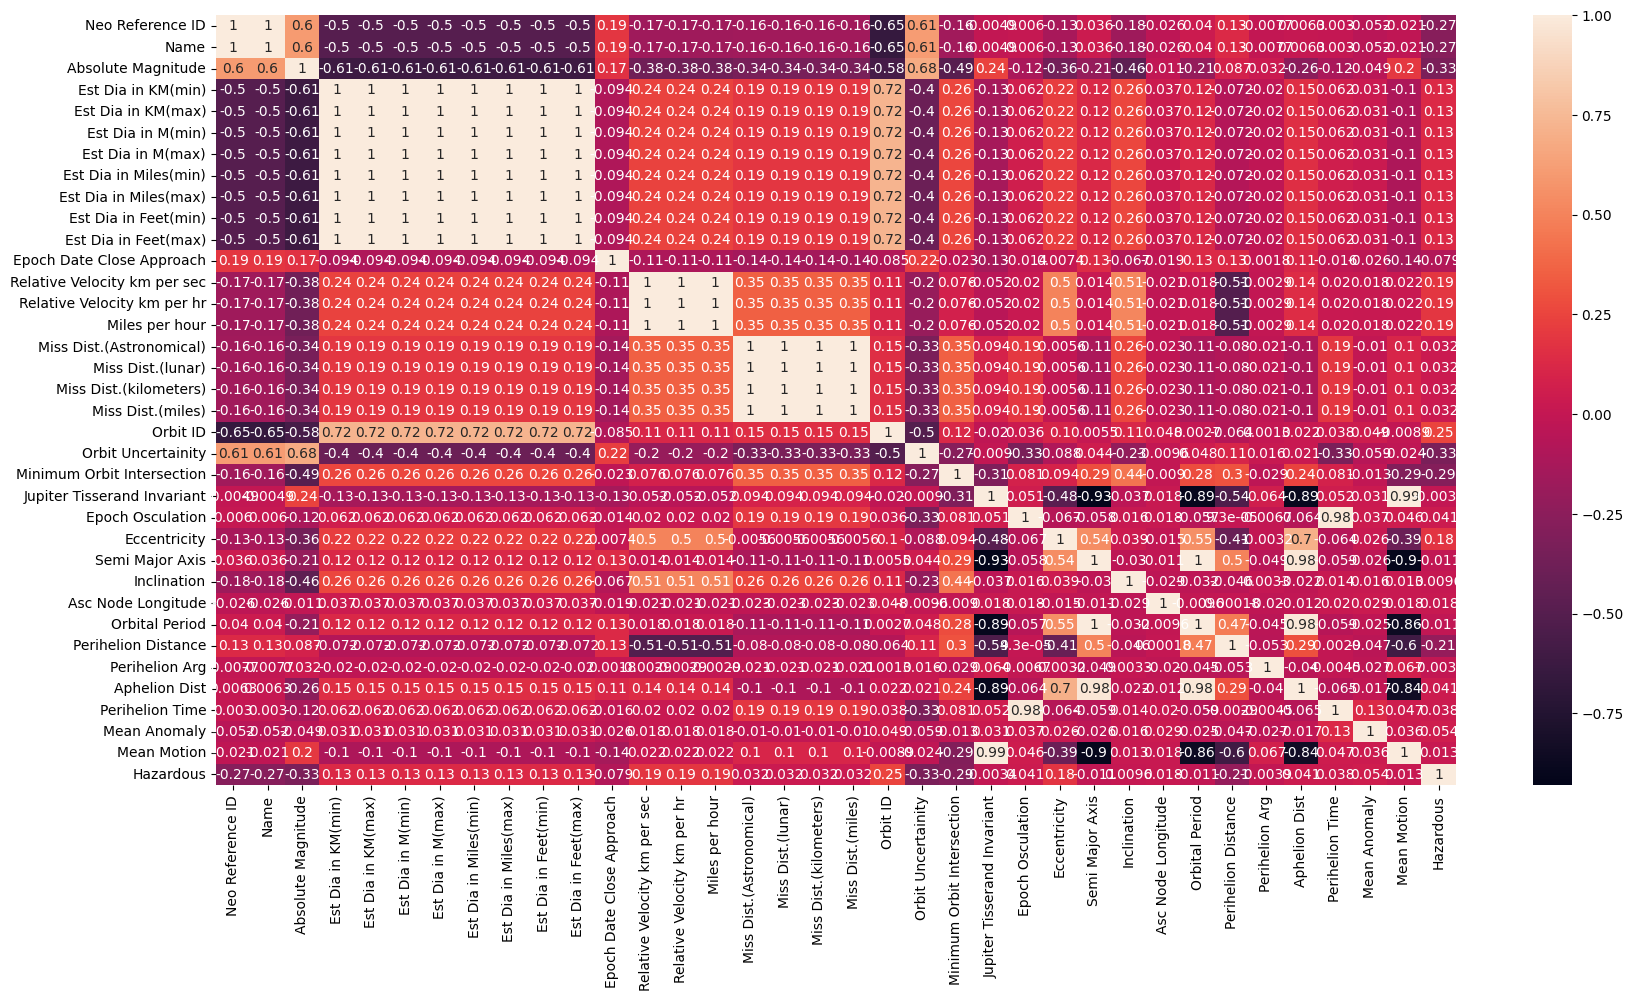

In [ ]:
corr = nasa_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot = True)
plt.show()

In [ ]:
# Get list of redundant set of features

corr_list = list()
for row in corr.index:
  corr_vars = set()
  for col in corr.columns:
    if abs(corr.loc[row, col]) > 0.8:
      corr_vars.add(col)
  if len(corr_vars) > 1 and corr_vars not in corr_list:
    corr_list.append(corr_vars)

corr_list

[{'Name', 'Neo Reference ID'},
 {'Est Dia in Feet(max)',
  'Est Dia in Feet(min)',
  'Est Dia in KM(max)',
  'Est Dia in KM(min)',
  'Est Dia in M(max)',
  'Est Dia in M(min)',
  'Est Dia in Miles(max)',
  'Est Dia in Miles(min)'},
 {'Miles per hour',
  'Relative Velocity km per hr',
  'Relative Velocity km per sec'},
 {'Miss Dist.(Astronomical)',
  'Miss Dist.(kilometers)',
  'Miss Dist.(lunar)',
  'Miss Dist.(miles)'},
 {'Aphelion Dist',
  'Jupiter Tisserand Invariant',
  'Mean Motion',
  'Orbital Period',
  'Semi Major Axis'},
 {'Epoch Osculation', 'Perihelion Time'}]

In [ ]:
# Dropping redundant features

drop_cols = ["Name",
             "Est Dia in Feet(max)",
             'Est Dia in Feet(min)',
             'Est Dia in KM(max)',
              'Est Dia in KM(min)',
              'Est Dia in Miles(max)',
              'Est Dia in Miles(min)',
            'Relative Velocity km per sec',
            'Miles per hour',
            'Miss Dist.(Astronomical)',
            'Miss Dist.(lunar)',
            'Miss Dist.(miles)',
            'Jupiter Tisserand Invariant',
            'Mean Motion',
            'Orbital Period',
            'Semi Major Axis',
            'Perihelion Time']

nasa_df = nasa_df.drop(drop_cols, axis=1)
nasa_df.head(5)


,Neo Reference ID,Absolute Magnitude,Est Dia in M(min),Est Dia in M(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per hr,Miss Dist.(kilometers),Orbiting Body,Orbit ID,...,Epoch Osculation,Eccentricity,Inclination,Asc Node Longitude,Perihelion Distance,Perihelion Arg,Aphelion Dist,Mean Anomaly,Equinox,Hazardous
0,3703080,21.6,127.219879,284.472297,1995-01-01,788947200000,22017.003799,62753692.0,Earth,17,...,2458000.5,0.425549,6.025981,314.373913,0.808259,57.257470,2.005764,264.837533,J2000,True
1,3723955,21.3,146.067964,326.617897,1995-01-01,788947200000,65210.346095,57298148.0,Earth,21,...,2458000.5,0.351674,28.412996,136.717242,0.718200,313.091975,1.497352,173.741112,J2000,False
2,2446862,20.3,231.502122,517.654482,1995-01-08,789552000000,27326.560182,7622911.5,Earth,22,...,2458000.5,0.348248,4.237961,259.475979,0.950791,248.415038,1.966857,292.893654,J2000,True
3,3092506,27.4,8.801465,19.680675,1995-01-15,790156800000,40225.948191,42683616.0,Earth,7,...,2458000.5,0.216578,7.905894,57.173266,0.983902,18.707701,1.527904,68.741007,J2000,False
4,3514799,21.6,127.219879,284.472297,1995-01-15,790156800000,35426.991794,61010824.0,Earth,25,...,2458000.5,0.210448,16.793382,84.629307,0.967687,158.263596,1.483543,135.142133,J2000,True


In [ ]:
# Dropping additional columns based on manual analysis
drop_cols = ["Orbiting Body",
             "Orbit Determination Date",
             "Equinox"
             ]

nasa_df = nasa_df.drop(drop_cols, axis=1)
nasa_df.head(5)

,Neo Reference ID,Absolute Magnitude,Est Dia in M(min),Est Dia in M(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per hr,Miss Dist.(kilometers),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Epoch Osculation,Eccentricity,Inclination,Asc Node Longitude,Perihelion Distance,Perihelion Arg,Aphelion Dist,Mean Anomaly,Hazardous
0,3703080,21.6,127.219879,284.472297,1995-01-01,788947200000,22017.003799,62753692.0,17,5,0.025282,2458000.5,0.425549,6.025981,314.373913,0.808259,57.257470,2.005764,264.837533,True
1,3723955,21.3,146.067964,326.617897,1995-01-01,788947200000,65210.346095,57298148.0,21,3,0.186935,2458000.5,0.351674,28.412996,136.717242,0.718200,313.091975,1.497352,173.741112,False
2,2446862,20.3,231.502122,517.654482,1995-01-08,789552000000,27326.560182,7622911.5,22,0,0.043058,2458000.5,0.348248,4.237961,259.475979,0.950791,248.415038,1.966857,292.893654,True
3,3092506,27.4,8.801465,19.680675,1995-01-15,790156800000,40225.948191,42683616.0,7,6,0.005512,2458000.5,0.216578,7.905894,57.173266,0.983902,18.707701,1.527904,68.741007,False
4,3514799,21.6,127.219879,284.472297,1995-01-15,790156800000,35426.991794,61010824.0,25,1,0.034798,2458000.5,0.210448,16.793382,84.629307,0.967687,158.263596,1.483543,135.142133,True


<ipython-input-13-13f766432cdd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(nasa_df.corr(), vmin=-1, vmax=1, annot = True)


Text(0.5, 1.0, 'Heatmap of Correlation of Attributes')

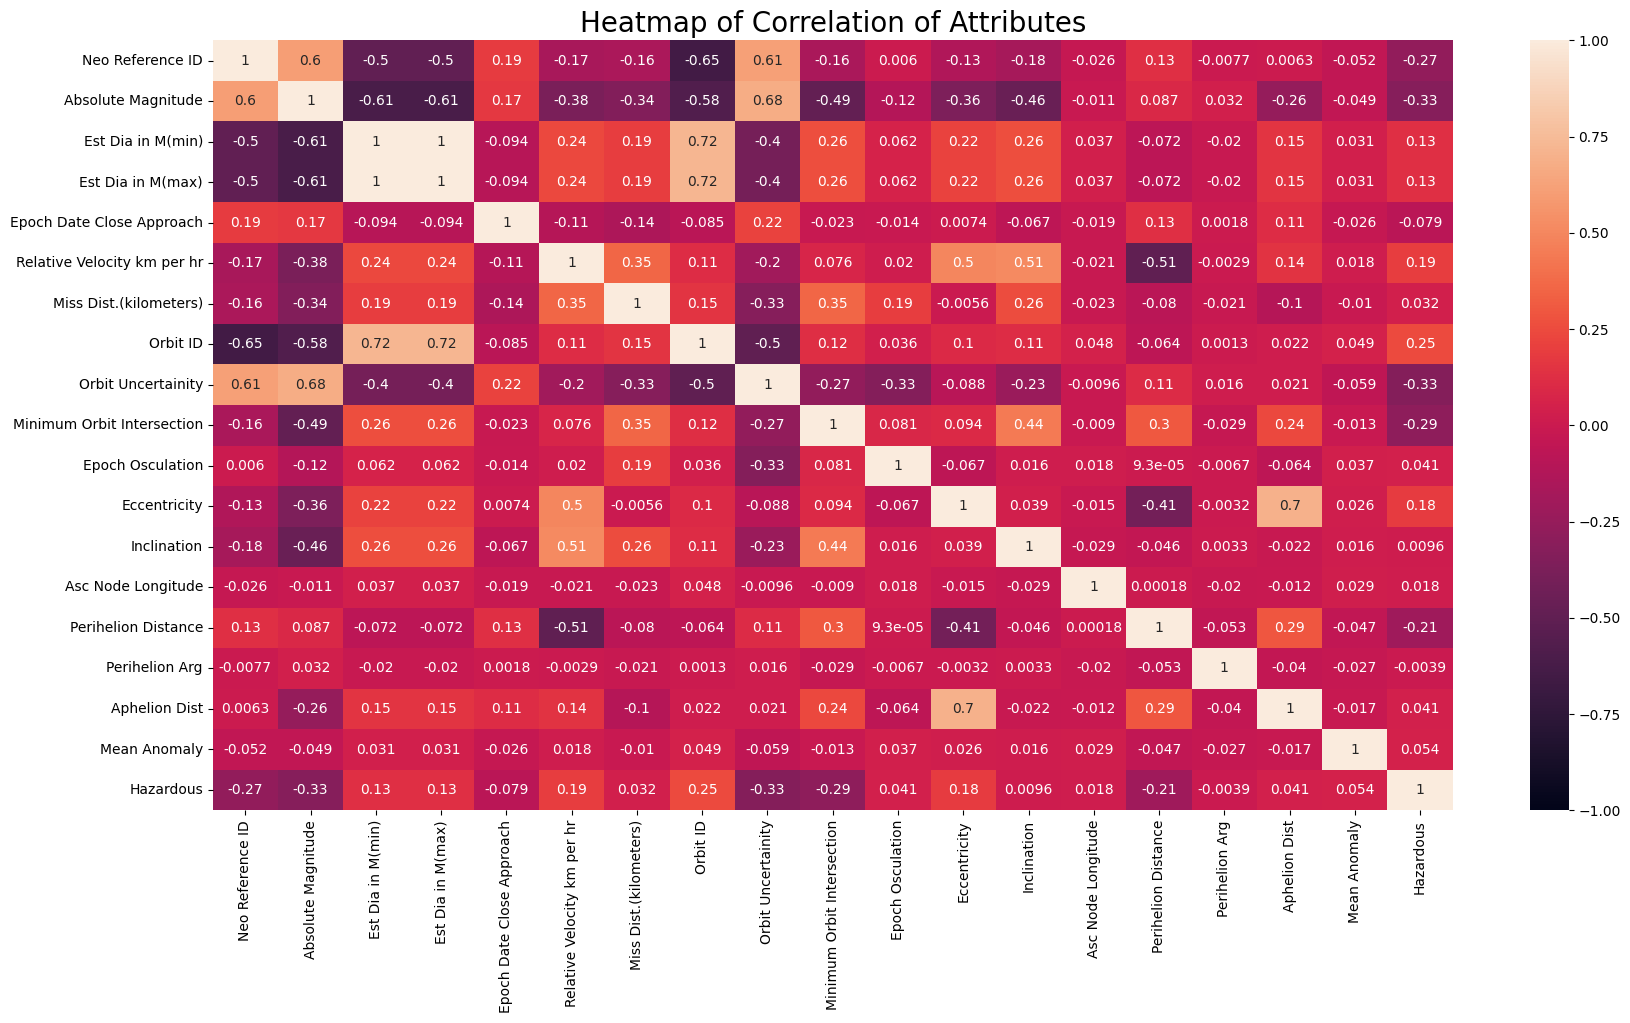

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(nasa_df.corr(), vmin=-1, vmax=1, annot = True)
plt.title("Heatmap of Correlation of Attributes", fontsize=20)

In [ ]:
nasa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Neo Reference ID             4687 non-null   int64  
 1   Absolute Magnitude           4687 non-null   float64
 2   Est Dia in M(min)            4687 non-null   float64
 3   Est Dia in M(max)            4687 non-null   float64
 4   Close Approach Date          4687 non-null   object 
 5   Epoch Date Close Approach    4687 non-null   int64  
 6   Relative Velocity km per hr  4687 non-null   float64
 7   Miss Dist.(kilometers)       4687 non-null   float64
 8   Orbit ID                     4687 non-null   int64  
 9   Orbit Uncertainity           4687 non-null   int64  
 10  Minimum Orbit Intersection   4687 non-null   float64
 11  Epoch Osculation             4687 non-null   float64
 12  Eccentricity                 4687 non-null   float64
 13  Inclination       

### Histogram of all the variables

Text(0.5, 0.98, 'Distribution of all the variables')

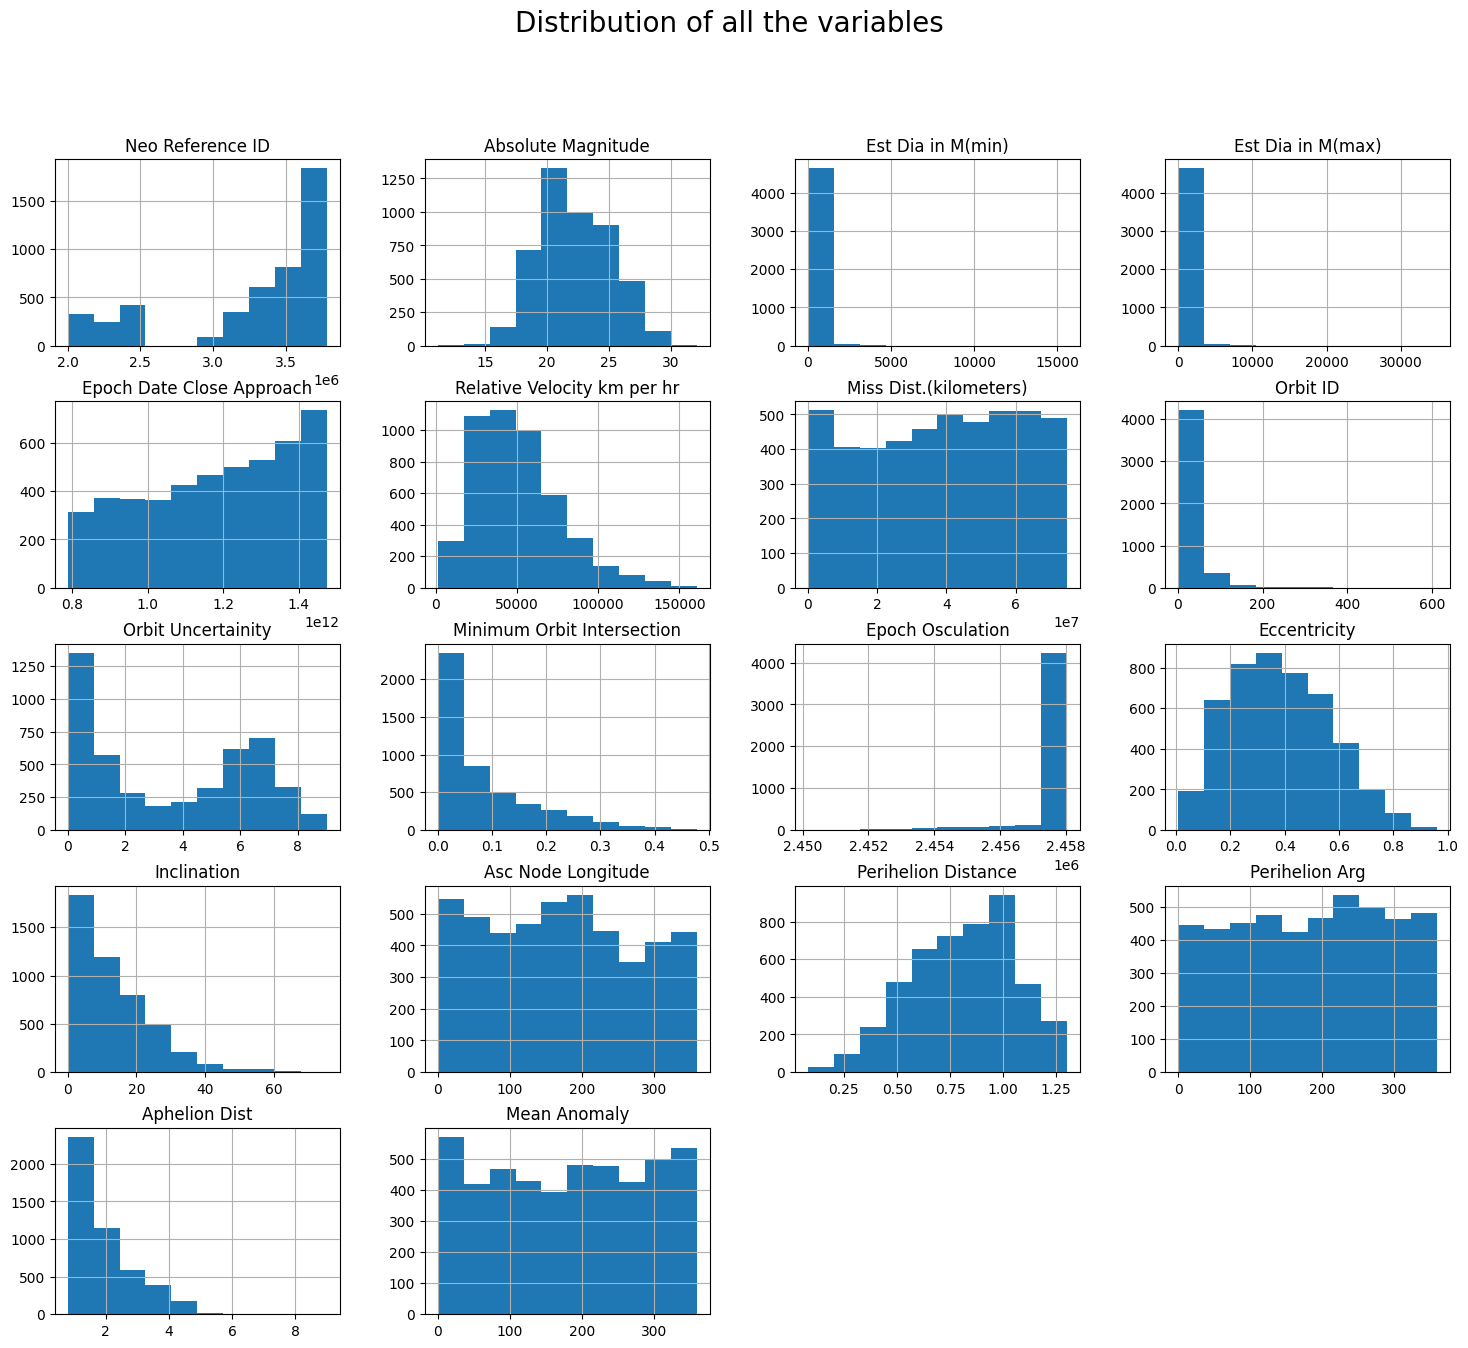

In [ ]:
nasa_df.hist(figsize=(18, 15))
plt.suptitle("Distribution of all the variables", fontsize=20)

### Data Transformation

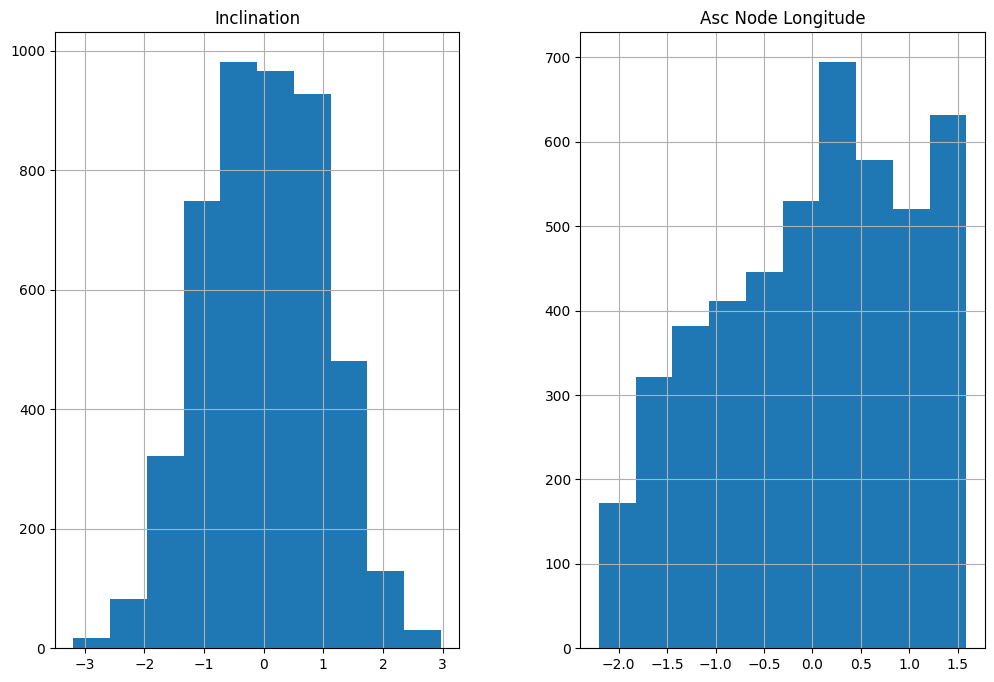

In [ ]:
from sklearn.preprocessing import PowerTransformer

trans_cols = ['Inclination', 'Asc Node Longitude']
boxcox = PowerTransformer(method="box-cox")
df_x = boxcox.fit_transform(nasa_df[trans_cols])
df_x = pd.DataFrame(df_x, columns=trans_cols)
df_x.hist(figsize=(12, 8))
plt.show()

Here we try out Box-Cox transformation on couple of variables to transform the variables that are not in normal distributions to approximate normal distributions so that model fitting can be done better. This is an experimental step and would be part of the trial and error during the model selection process.

In [ ]:
# Performing transformation

nasa_df[trans_cols] = df_x[trans_cols]
nasa_df

,Neo Reference ID,Absolute Magnitude,Est Dia in M(min),Est Dia in M(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per hr,Miss Dist.(kilometers),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Epoch Osculation,Eccentricity,Inclination,Asc Node Longitude,Perihelion Distance,Perihelion Arg,Aphelion Dist,Mean Anomaly,Hazardous
0,3703080,21.600,127.219879,284.472297,1995-01-01,788947200000,22017.003799,6.275369e+07,17,5,0.025282,2458000.5,0.425549,-0.550416,1.264877,0.808259,57.257470,2.005764,264.837533,True
1,3723955,21.300,146.067964,326.617897,1995-01-01,788947200000,65210.346095,5.729815e+07,21,3,0.186935,2458000.5,0.351674,1.294625,-0.211045,0.718200,313.091975,1.497352,173.741112,False
2,2446862,20.300,231.502122,517.654482,1995-01-08,789552000000,27326.560182,7.622912e+06,22,0,0.043058,2458000.5,0.348248,-0.864183,0.848983,0.950791,248.415038,1.966857,292.893654,True
3,3092506,27.400,8.801465,19.680675,1995-01-15,790156800000,40225.948191,4.268362e+07,7,6,0.005512,2458000.5,0.216578,-0.285127,-1.088974,0.983902,18.707701,1.527904,68.741007,False
4,3514799,21.600,127.219879,284.472297,1995-01-15,790156800000,35426.991794,6.101082e+07,25,1,0.034798,2458000.5,0.210448,0.572516,-0.755972,0.967687,158.263596,1.483543,135.142133,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,23.900,44.111820,98.637028,2016-09-08,1473318000000,79755.354273,6.187511e+06,4,8,0.019777,2457637.5,0.361512,1.823191,0.047272,0.741558,276.395697,1.581299,304.306025,False
4683,3759295,28.200,6.089126,13.615700,2016-09-08,1473318000000,11610.539577,9.677324e+05,2,6,0.006451,2458000.5,0.073200,-0.658405,1.487826,0.996434,42.111064,1.153835,282.978786,False
4684,3759714,22.700,76.657557,171.411509,2016-09-08,1473318000000,25889.910626,9.126775e+06,17,6,0.059972,2458000.5,0.368055,-0.831203,-1.369400,0.965760,274.692712,2.090708,203.501147,False
4685,3759720,21.800,116.025908,259.441818,2016-09-08,1473318000000,40867.522309,3.900908e+07,6,5,0.177510,2458000.5,0.202565,0.871030,0.043798,1.185467,180.346090,1.787733,203.524965,False


### Categorical variable

In [ ]:
nasa_df["Orbit ID"].value_counts()

8      235
9      227
7      212
10     205
11     198
      ... 
130      1
170      1
324      1
127      1
107      1
Name: Orbit ID, Length: 188, dtype: int64

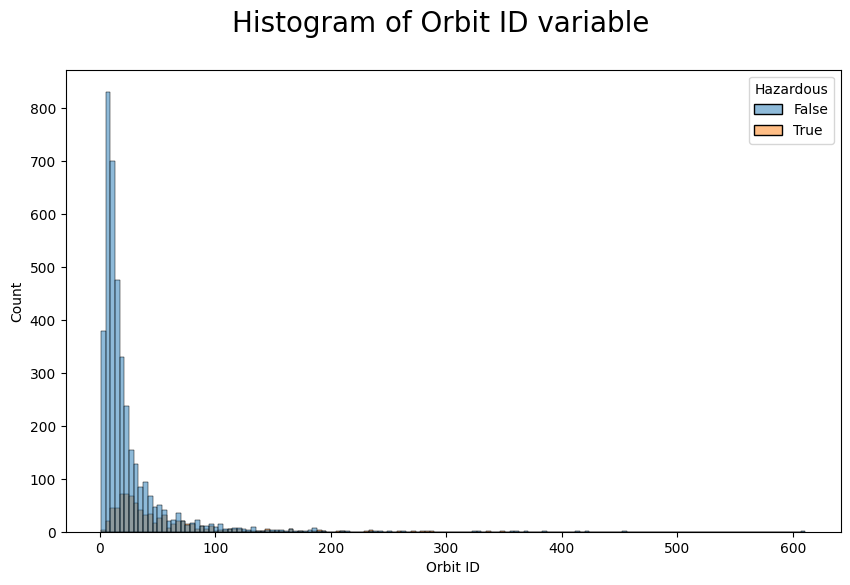

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=nasa_df, x="Orbit ID", hue="Hazardous", bins=150,
             ax=ax)
plt.suptitle("Histogram of Orbit ID variable", fontsize=20)
plt.show()

The above plot shows the distribution of Orbit ID which is a categorical variable. The distribution of this variable with respect to the target variable do not provide significant difference between each of the class. Since the categorical variable is already in the Nominal encoding form, we are not required to perform any transformation on this variable.

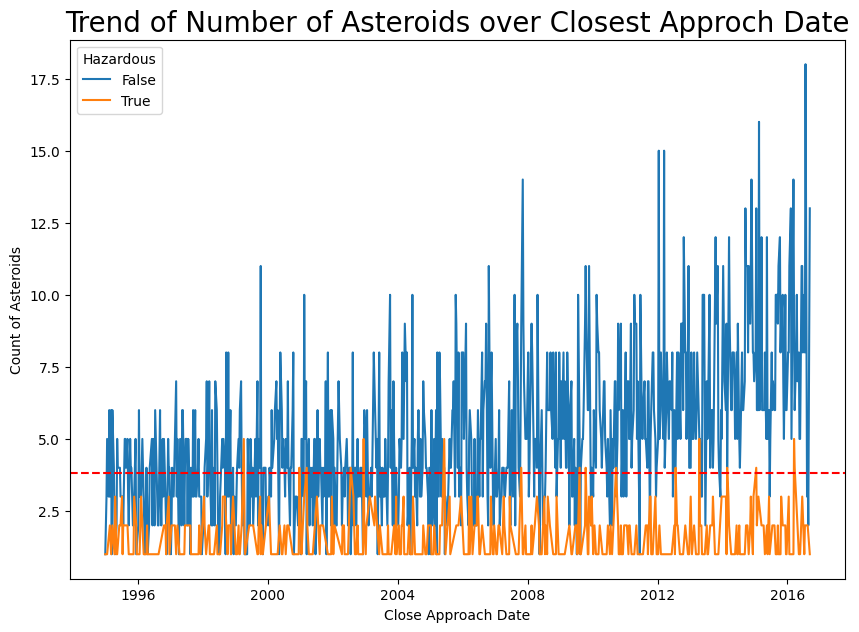

In [ ]:
# Time Series of Asteroids based on Close Approach Date

nasa_df.sort_values(by="Close Approach Date", inplace=True)
nasa_df['Close Approach Date'] = pd.to_datetime(nasa_df["Close Approach Date"],
                                                format='%Y-%m-%d')

name_count=nasa_df.groupby(['Close Approach Date', "Hazardous"],
                           as_index=False).count()
fig, ax = plt.subplots(figsize=(10, 7))
sns.lineplot(data=name_count, x="Close Approach Date", y="Orbit ID",
                hue="Hazardous", ax=ax)

# plt.plot(name_count['Close Approach Date'],name_count['Neo Reference ID'])
# plt.xlabel("Close Approach Date")
plt.ylabel("Count of Asteroids")
plt.title("Trend of Number of Asteroids over Closest Approch Date", fontsize=20)
plt.axhline(name_count['Neo Reference ID'].mean(), color='r',
            linestyle='--', label='Mean')
# plt.legend()
plt.show()


The above plot shows the trend of asteroids count that has been observed over the recent years. When divided between hazardous and non-hazardous, it can be seen that there is gap between the both. But this is mostly due to the high number of occurences of non hazardous asteroids compared to hazardous.

In [ ]:
drop_cols = ["Close Approach Date", "Neo Reference ID"]

nasa_df.drop(drop_cols, axis=1, inplace=True)
nasa_df.head()

,Absolute Magnitude,Est Dia in M(min),Est Dia in M(max),Epoch Date Close Approach,Relative Velocity km per hr,Miss Dist.(kilometers),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Epoch Osculation,Eccentricity,Inclination,Asc Node Longitude,Perihelion Distance,Perihelion Arg,Aphelion Dist,Mean Anomaly,Hazardous
0,21.6,127.219879,284.472297,788947200000,22017.003799,62753692.0,17,5,0.025282,2458000.5,0.425549,-0.550416,1.264877,0.808259,57.257470,2.005764,264.837533,True
1,21.3,146.067964,326.617897,788947200000,65210.346095,57298148.0,21,3,0.186935,2458000.5,0.351674,1.294625,-0.211045,0.718200,313.091975,1.497352,173.741112,False
2,20.3,231.502122,517.654482,789552000000,27326.560182,7622911.5,22,0,0.043058,2458000.5,0.348248,-0.864183,0.848983,0.950791,248.415038,1.966857,292.893654,True
3,27.4,8.801465,19.680675,790156800000,40225.948191,42683616.0,7,6,0.005512,2458000.5,0.216578,-0.285127,-1.088974,0.983902,18.707701,1.527904,68.741007,False
4,21.6,127.219879,284.472297,790156800000,35426.991794,61010824.0,25,1,0.034798,2458000.5,0.210448,0.572516,-0.755972,0.967687,158.263596,1.483543,135.142133,True


## Model exploration and model selection

### Splitting the dataset

In [ ]:
# Splitting the dataset to train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(nasa_df.iloc[:, :-1],
                                                    nasa_df.iloc[:, -1],
                                                    test_size=0.15,
                                                    random_state=6)

In [ ]:
print("Train data shape: ", X_train.shape)
print("Test data shape: ", X_test.shape)

Train data shape:  (3983, 17)
Test data shape:  (704, 17)


Text(0.5, 0.98, 'Target Variable Distribution before Oversampling')

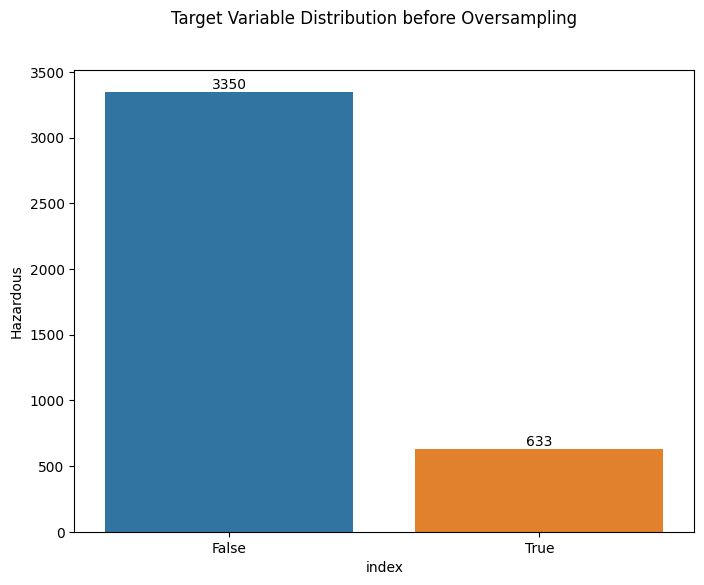

In [ ]:
df_temp = pd.DataFrame(y_train.value_counts()).reset_index()

fig, ax = plt.subplots(figsize=(8, 6))
g = sns.barplot(data=df_temp, x="index", y="Hazardous", ax=ax)
ax.bar_label(ax.containers[0])
plt.suptitle("Target Variable Distribution before Oversampling")

### Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=1)
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

Text(0.5, 0.98, 'Target Variable Distribution after Oversampling')

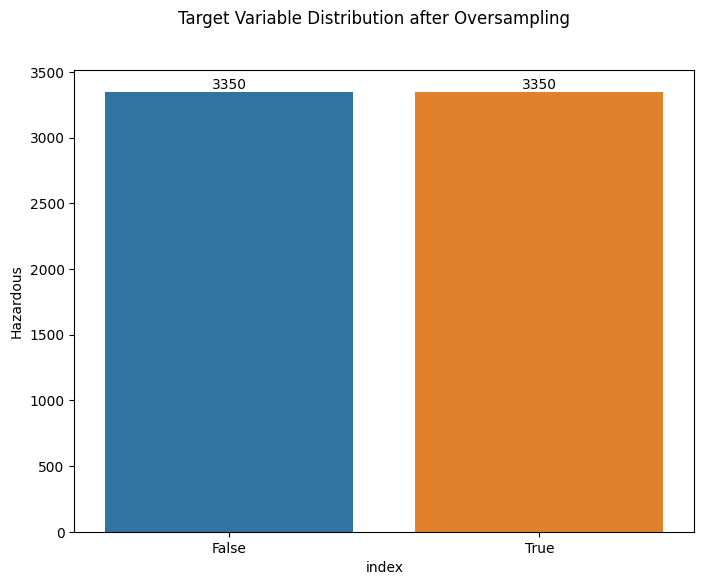

In [ ]:
df_temp = pd.DataFrame(y_train_over.value_counts()).reset_index()

fig, ax = plt.subplots(figsize=(8, 6))
g = sns.barplot(data=df_temp, x="index", y="Hazardous", ax=ax)
ax.bar_label(ax.containers[0])
plt.suptitle("Target Variable Distribution after Oversampling")

### Model 1 Logistic Regression

In [ ]:
res_cols = ["Model", "Accuracy", "Balanced Accuracy Score",
                             "Precision", "Recall", "F1 Score", "ROC-AUC"]
df_res = pd.DataFrame(columns=res_cols)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

logReg = LogisticRegression(random_state=6, max_iter=10000)
logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)

print("Accuracy for Logistic Regression: ", accuracy_score(y_test, y_pred))
print("Balanced Accuracy Score for Logistic Regression: ", balanced_accuracy_score(y_test, y_pred))
print("Precision for Logistic Regression: ", precision_score(y_test, y_pred))
print("Recall for Logistic Regression: ", recall_score(y_test, y_pred))
print("F1 Score for Logistic Regression: ", f1_score(y_test, y_pred))

res_list = ["Logistic Regression", accuracy_score(y_test, y_pred),
            balanced_accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),
            recall_score(y_test, y_pred), f1_score(y_test, y_pred),
            roc_auc_score(y_test, y_pred)]
df_temp = pd.DataFrame(dict(zip(res_cols, res_list)), index=[0])
df_res = pd.concat([df_res, df_temp], ignore_index=True)

Accuracy for Logistic Regression:  0.8267045454545454
Balanced Accuracy Score for Logistic Regression:  0.5
Precision for Logistic Regression:  0.0
Recall for Logistic Regression:  0.0
F1 Score for Logistic Regression:  0.0


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


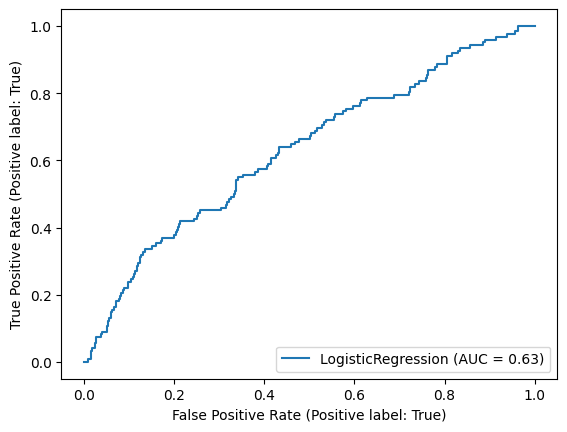

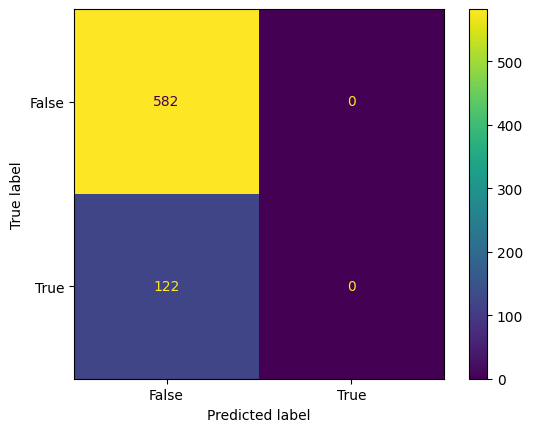

In [ ]:
#ROC curve for Logistic Regression

from sklearn.metrics import RocCurveDisplay
log_roc = RocCurveDisplay.from_estimator(logReg, X_test, y_test)

#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=logReg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logReg.classes_)
disp.plot()

### Model 2 Gaussian Naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gNB = GaussianNB()
gNB.fit(X_train_over, y_train_over)

y_pred = gNB.predict(X_test)

print("Accuracy for Naive Bayes Classifier: ", accuracy_score(y_test, y_pred))
print("Balanced Accuracy Score for Naive Bayes Classifier: ", balanced_accuracy_score(y_test, y_pred))
print("Precision for Naive Bayes Classifier: ", precision_score(y_test, y_pred))
print("Recall for Naive Bayes Classifier: ", recall_score(y_test, y_pred))
print("F1 Score for Naive Bayes Classifier: ", f1_score(y_test, y_pred))

res_list = ["Gaussian Naive Bayes", accuracy_score(y_test, y_pred),
            balanced_accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),
            recall_score(y_test, y_pred), f1_score(y_test, y_pred)]
df_temp = pd.DataFrame(dict(zip(res_cols, res_list)), index=[0])
df_res = pd.concat([df_res, df_temp], ignore_index=True)

Accuracy for Naive Bayes Classifier:  0.6022727272727273
Balanced Accuracy Score for Naive Bayes Classifier:  0.5910089572418455
Precision for Naive Bayes Classifier:  0.2348993288590604
Recall for Naive Bayes Classifier:  0.5737704918032787
F1 Score for Naive Bayes Classifier:  0.33333333333333337


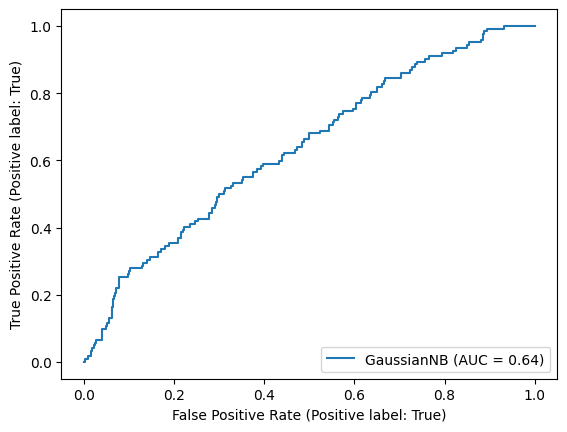

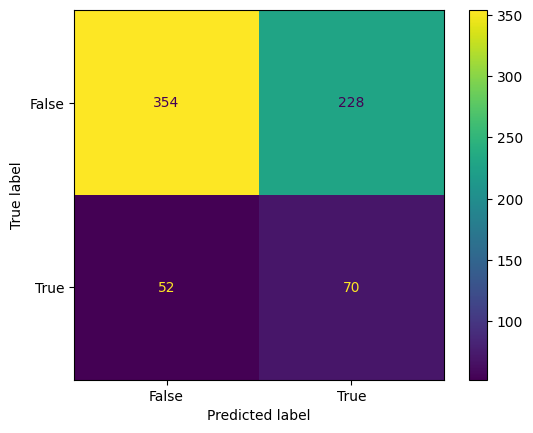

In [ ]:
#ROC curve for Gaussian NB
from sklearn.metrics import RocCurveDisplay
gNB_roc = RocCurveDisplay.from_estimator(gNB, X_test, y_test)

#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=gNB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gNB.classes_)
disp.plot()


###  Model 3 SGD Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier

SGD = SGDClassifier(random_state=42, max_iter=10000)
SGD.fit(X_train_over, y_train_over)

y_pred = SGD.predict(X_test)

print("Accuracy for Stochastic Descent Classifier: ", accuracy_score(y_test, y_pred))
print("Balanced Accuracy Score for Stochastic Descent Classifier: ", balanced_accuracy_score(y_test, y_pred))
print("Precision for Stochastic Descent Classifier: ", precision_score(y_test, y_pred))
print("Recall for Stochastic Descent Classifier: ", recall_score(y_test, y_pred))
print("F1 Score for Stochastic Descent Classifier: ", f1_score(y_test, y_pred))

res_list = ["SGD Classifier", accuracy_score(y_test, y_pred),
            balanced_accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),
            recall_score(y_test, y_pred), f1_score(y_test, y_pred)]
df_temp = pd.DataFrame(dict(zip(res_cols, res_list)), index=[0])
df_res = pd.concat([df_res, df_temp], ignore_index=True)

Accuracy for Stochastic Descent Classifier:  0.8267045454545454
Balanced Accuracy Score for Stochastic Descent Classifier:  0.5
Precision for Stochastic Descent Classifier:  0.0
Recall for Stochastic Descent Classifier:  0.0
F1 Score for Stochastic Descent Classifier:  0.0


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


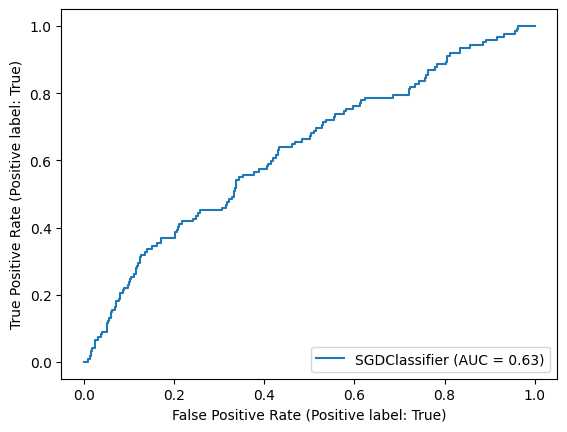

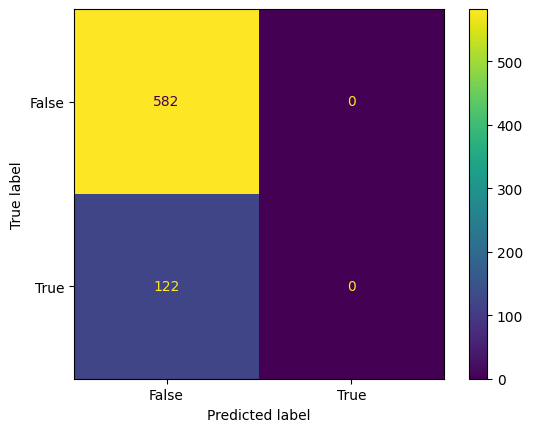

In [ ]:
#ROC curve SGD Classifier
from sklearn.metrics import RocCurveDisplay
SGD_roc = RocCurveDisplay.from_estimator(SGD, X_test, y_test)

#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=SGD.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SGD.classes_)
disp.plot()


### Model 4 SVC

In [ ]:
from sklearn.svm import SVC

SVC_clf = SVC(random_state=44)
SVC_clf.fit(X_train_over, y_train_over)

y_pred = SVC_clf.predict(X_test)

print("Accuracy for Support Vector Machine Classifier: ", accuracy_score(y_test, y_pred))
print("Balanced Accuracy Score for Support Vector Machine Classifier: ", balanced_accuracy_score(y_test, y_pred))
print("Precision for Support Vector Machine Classifier: ", precision_score(y_test, y_pred))
print("Recall for Support Vector Machine Classifier: ", recall_score(y_test, y_pred))
print("F1 Score for Support Vector Machine Classifier: ", f1_score(y_test, y_pred))

res_list = ["Support Vector Machines", accuracy_score(y_test, y_pred),
            balanced_accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),
            recall_score(y_test, y_pred), f1_score(y_test, y_pred)]
df_temp = pd.DataFrame(dict(zip(res_cols, res_list)), index=[0])
df_res = pd.concat([df_res, df_temp], ignore_index=True)

Accuracy for Support Vector Machine Classifier:  0.5127840909090909
Balanced Accuracy Score for Support Vector Machine Classifier:  0.5887133119260887
Precision for Support Vector Machine Classifier:  0.21882951653944022
Recall for Support Vector Machine Classifier:  0.7049180327868853
F1 Score for Support Vector Machine Classifier:  0.3339805825242719


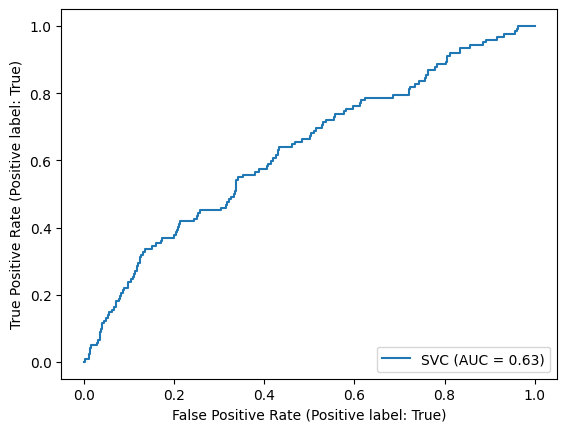

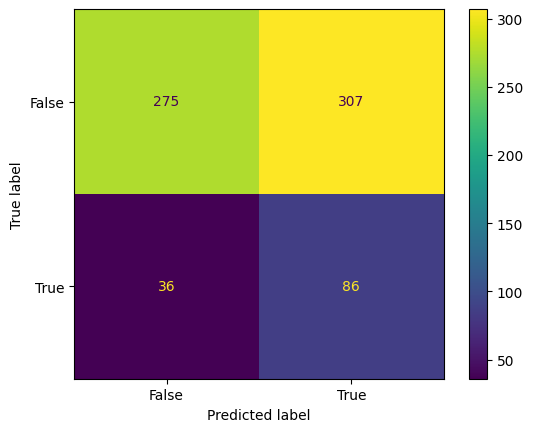

In [ ]:
#ROC curve for SVC
from sklearn.metrics import RocCurveDisplay
SVC_clf_roc = RocCurveDisplay.from_estimator(SVC_clf, X_test, y_test)

#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=SVC_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVC_clf.classes_)
disp.plot()

### Model 5 Decision Tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(random_state=42)
DTC.fit(X_train, y_train)

y_pred = DTC.predict(X_test)

print("Accuracy for Decision Tree Classifier: ", accuracy_score(y_test, y_pred))
print("Balanced Accuracy Score for Decision Tree Classifier: ", balanced_accuracy_score(y_test, y_pred))
print("Precision for Decision Tree Classifier: ", precision_score(y_test, y_pred))
print("Recall for Decision Tree Classifier: ", recall_score(y_test, y_pred))
print("F1 Score for Decision Tree Classifier: ", f1_score(y_test, y_pred))

res_list = ["Decision Tree Classifier", accuracy_score(y_test, y_pred),
            balanced_accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),
            recall_score(y_test, y_pred), f1_score(y_test, y_pred)]
df_temp = pd.DataFrame(dict(zip(res_cols, res_list)), index=[0])
df_res = pd.concat([df_res, df_temp], ignore_index=True)

Accuracy for Decision Tree Classifier:  0.9943181818181818
Balanced Accuracy Score for Decision Tree Classifier:  0.9933243197566335
Precision for Decision Tree Classifier:  0.9758064516129032
Recall for Decision Tree Classifier:  0.9918032786885246
F1 Score for Decision Tree Classifier:  0.983739837398374


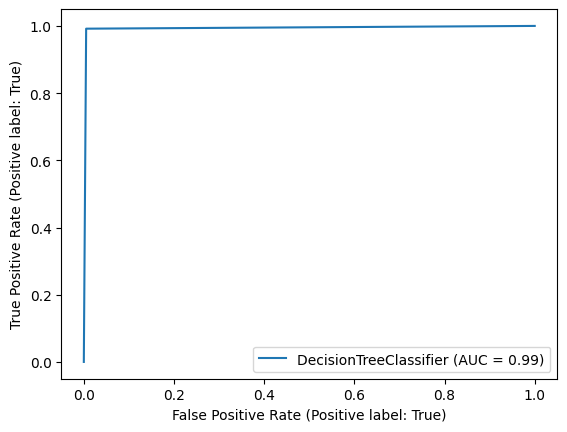

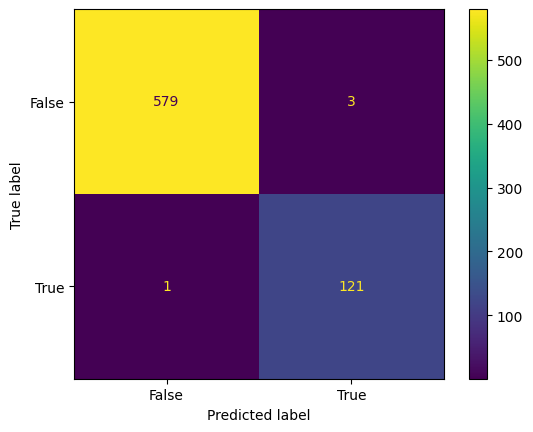

In [ ]:
#ROC curve for Decision Tree Classifier
from sklearn.metrics import RocCurveDisplay
DTC_roc = RocCurveDisplay.from_estimator(DTC, X_test, y_test)

#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=DTC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DTC.classes_)
disp.plot()


### Model 6 Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rForest = RandomForestClassifier(max_depth=10, random_state=42)
rForest.fit(X_train_over, y_train_over)

y_pred = rForest.predict(X_test)

print("Accuracy for Random Forest Classifier: ", accuracy_score(y_test, y_pred))
print("Balanced Accuracy Score for Random Forest Classifier: ", balanced_accuracy_score(y_test, y_pred))
print("Precision for Random Forest Classifier: ", precision_score(y_test, y_pred))
print("Recall for Random Forest Classifier: ", recall_score(y_test, y_pred))
print("F1 Score for Random Forest Classifier: ", f1_score(y_test, y_pred))

res_list = ["Random Forest Classifier", accuracy_score(y_test, y_pred),
            balanced_accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),
            recall_score(y_test, y_pred), f1_score(y_test, y_pred)]
df_temp = pd.DataFrame(dict(zip(res_cols, res_list)), index=[0])
df_res = pd.concat([df_res, df_temp], ignore_index=True)

Accuracy for Random Forest Classifier:  0.9957386363636364
Balanced Accuracy Score for Random Forest Classifier:  0.9974226804123711
Precision for Random Forest Classifier:  0.976
Recall for Random Forest Classifier:  1.0
F1 Score for Random Forest Classifier:  0.9878542510121457


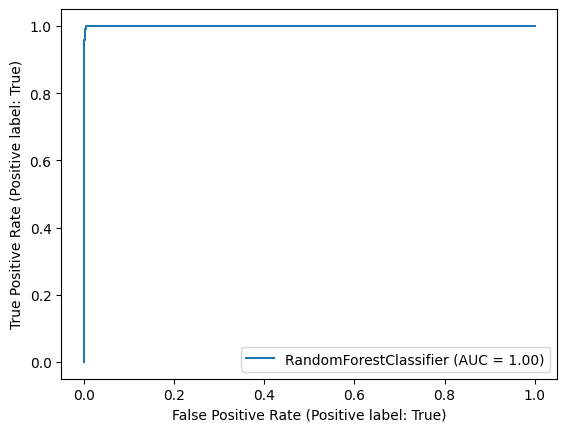

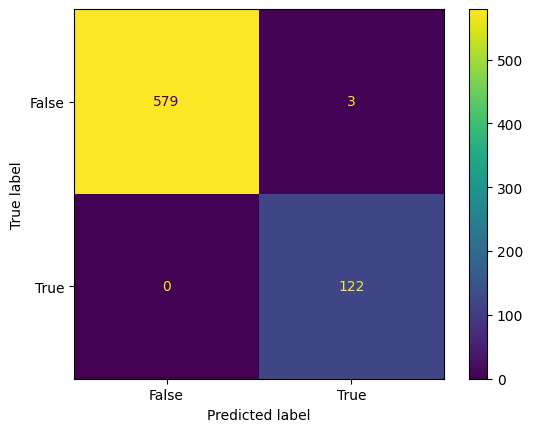

In [ ]:
#ROC curve for Random Forest
from sklearn.metrics import RocCurveDisplay
rForest_roc = RocCurveDisplay.from_estimator(rForest, X_test, y_test)

#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=rForest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rForest.classes_)
disp.plot()


In [ ]:
df_res

,Model,Accuracy,Balanced Accuracy Score,Precision,Recall,F1 Score
0,Logistic Regression,0.826705,0.500000,0.000000,0.000000,0.000000
1,Gaussian Naive Bayes,0.602273,0.591009,0.234899,0.573770,0.333333
2,SGD Classifier,0.826705,0.500000,0.000000,0.000000,0.000000
3,Support Vector Machines,0.512784,0.588713,0.218830,0.704918,0.333981
4,Decision Tree Classifier,0.994318,0.993324,0.975806,0.991803,0.983740
5,Random Forest Classifier,0.995739,0.997423,0.976000,1.000000,0.987854


In [ ]:
# # Building pipeline - More elements if required will be added further

# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler

# pipe = Pipeline([("scaler", StandardScaler())])
# X_train_nrm = pipe.fit_transform(X_train)

# print(X_train_nrm.shape)

(3983, 17)


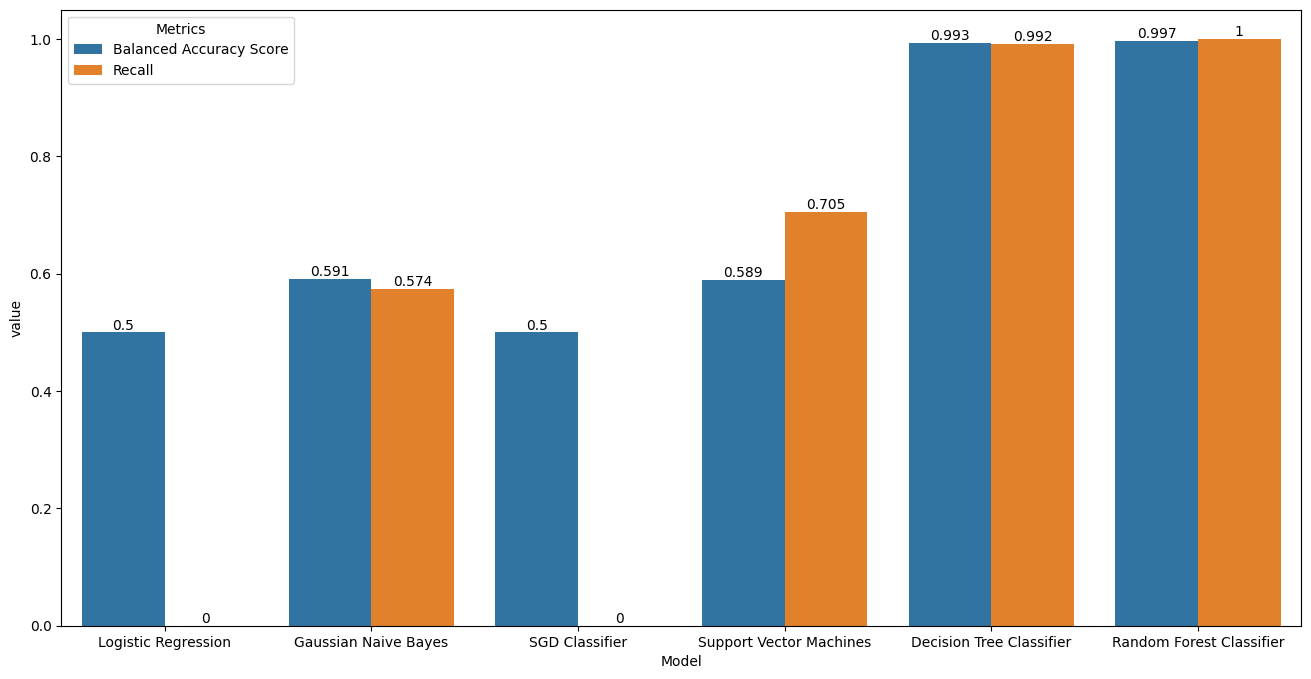

In [ ]:
df_res_melt = pd.melt(df_res, ["Model"], ["Balanced Accuracy Score", "Recall",],
                      var_name="Metrics")
df_res_melt.value = round(df_res_melt.value, 3)

fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(df_res_melt, x="Model", y="value", hue="Metrics", ax=ax)

for i in ax.containers:
    ax.bar_label(i,)

## Performance Evaluation

In [ ]:
#Data Exploration
reg = LogisticRegression(random_state=6, max_iter=10000)
gNB = GaussianNB()
Sgd = SGDClassifier(random_state=42, max_iter=10000)
SVC_clf = SVC(random_state=44)
DTC = DecisionTreeClassifier(random_state=42)
RFC = RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
reg.fit(X_train, y_train)
gNB.fit(X_train_over, y_train_over)
Sgd.fit(X_train_over, y_train_over)
SVC_clf.fit(X_train_over, y_train_over)
DTC.fit(X_train, y_train)
RFC.fit(X_train_over, y_train_over)



RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
model = [reg, gNB, Sgd, SVC_clf, DTC, RFC]
y_pred = []

In [ ]:
for i in model:
    pred = i.predict(X_test)
    y_pred.append(pred)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, roc_auc_score, recall_score, precision_score
roc_score = []
acc= []
f1Sco = []
precision = []
recall = []
for i in y_pred:
    roc = roc_auc_score(y_test, i)
    acc1 = accuracy_score(y_test, i)
    f1Sco1 = f1_score(y_test, i)
    precision1 = precision_score(y_test,i)
    recall1 = recall_score(y_test,i)
    roc_score.append(roc)
    acc.append(acc1)
    f1Sco.append(f1Sco1)
    precision.append(precision1)
    recall.append(recall1)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
eval_pm = pd.DataFrame({'Model name': ['Logistic', 'GNB','SGDClass', 'SVC', 'DTClass', 'RandomForest'], "Accuracy": acc, "F1 Score": f1Sco, "Precision": precision, "Recall": recall, "Roc_score": roc_score})
eval_pm

,Model name,Accuracy,F1 Score,Precision,Recall,Roc_score
0,Logistic,0.826705,0.000000,0.000000,0.000000,0.500000
1,GNB,0.602273,0.333333,0.234899,0.573770,0.591009
2,SGDClass,0.826705,0.000000,0.000000,0.000000,0.500000
3,SVC,0.512784,0.333981,0.218830,0.704918,0.588713
4,DTClass,0.994318,0.983740,0.975806,0.991803,0.993324
5,RandomForest,0.995739,0.987854,0.976000,1.000000,0.997423


In [ ]:
cf_matrix_reg = confusion_matrix(y_pred[0], y_test)
cf_matrix_gNB = confusion_matrix(y_pred[1], y_test)
cf_matrix_Sgd = confusion_matrix(y_pred[2], y_test)
cf_matrix_SVC = confusion_matrix(y_pred[3], y_test)
cf_matrix_DTC = confusion_matrix(y_pred[4], y_test)
cf_matrix_RF = confusion_matrix(y_pred[5], y_test)

<Axes: >

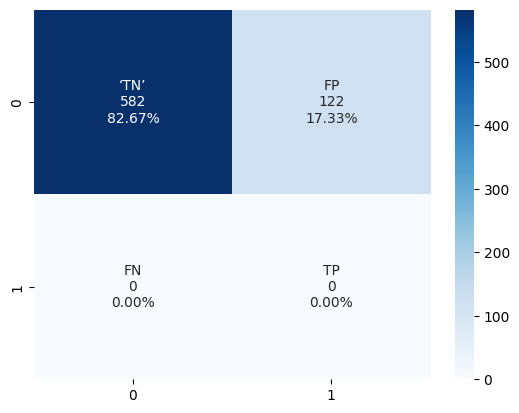

In [ ]:
#Confusion Matrix for Logistic Regression
group_names = ['‘TN’','FP','FN','TP']
group_counts_reg = ["{0:0.0f}".format(value) for value in
                cf_matrix_reg.flatten()]
group_percentages_reg = ["{0:.2%}".format(value) for value in
                     cf_matrix_reg.flatten()/np.sum(cf_matrix_reg)]
labels_reg = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts_reg, group_percentages_reg)]
labels_reg = np.asarray(labels_reg).reshape(2,2)
sns.heatmap(cf_matrix_reg, annot=labels_reg, fmt='', cmap='Blues')

<Axes: >

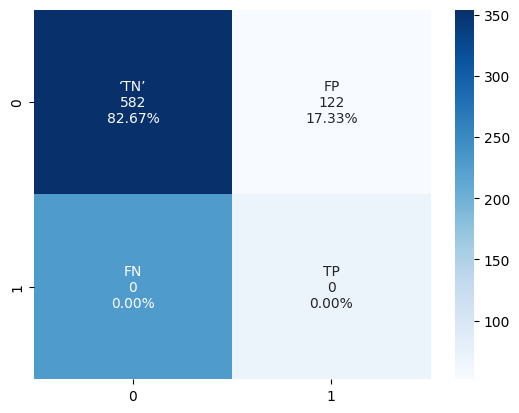

In [ ]:
#Confusion Matrix for Gaussian NB
group_names = ['‘TN’','FP','FN','TP']
group_counts_gNB = ["{0:0.0f}".format(value) for value in
                cf_matrix_gNB.flatten()]
group_percentages_gNB = ["{0:.2%}".format(value) for value in
                     cf_matrix_gNB.flatten()/np.sum(cf_matrix_gNB)]
labels_gNB = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts_gNB, group_percentages_reg)]
labels_gNB = np.asarray(labels_reg).reshape(2,2)
sns.heatmap(cf_matrix_gNB, annot=labels_reg, fmt='', cmap='Blues')

<Axes: >

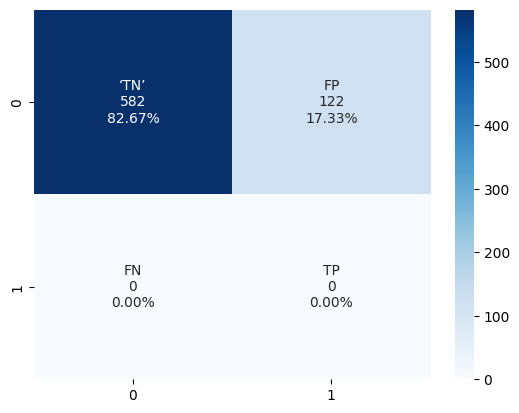

In [ ]:
#Confusion Matrix for SGD Classifier
group_names = ['‘TN’','FP','FN','TP']
group_counts_Sgd = ["{0:0.0f}".format(value) for value in
                cf_matrix_Sgd.flatten()]
group_percentages_Sgd = ["{0:.2%}".format(value) for value in
                     cf_matrix_Sgd.flatten()/np.sum(cf_matrix_Sgd)]
labels_Sgd = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts_Sgd, group_percentages_Sgd)]
labels_Sgd = np.asarray(labels_Sgd).reshape(2,2)
sns.heatmap(cf_matrix_Sgd, annot=labels_Sgd, fmt='', cmap='Blues')

<Axes: >

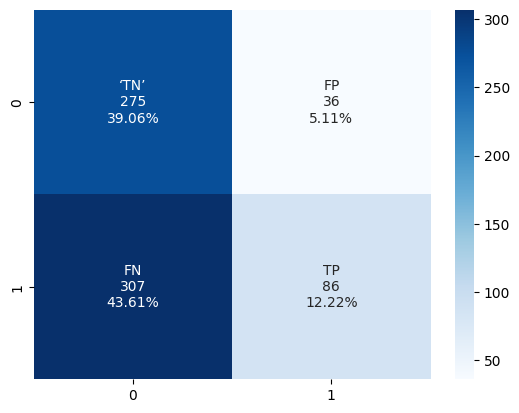

In [ ]:
#Confusion Matrix for SVM
group_names = ['‘TN’','FP','FN','TP']
group_counts_SVC = ["{0:0.0f}".format(value) for value in
                cf_matrix_SVC.flatten()]
group_percentages_SVC = ["{0:.2%}".format(value) for value in
                     cf_matrix_SVC.flatten()/np.sum(cf_matrix_SVC)]
labels_SVC = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts_SVC, group_percentages_SVC)]
labels_SVC = np.asarray(labels_SVC).reshape(2,2)
sns.heatmap(cf_matrix_SVC, annot=labels_SVC, fmt='', cmap='Blues')

<Axes: >

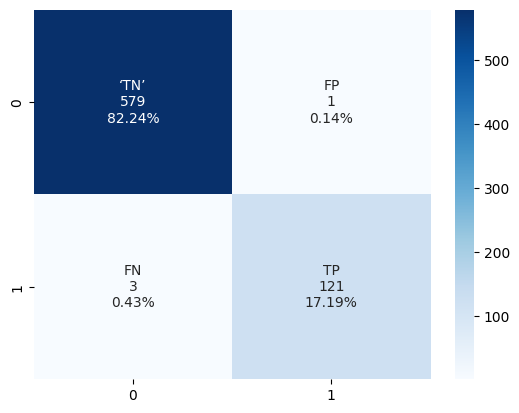

In [ ]:
#Confusion Matrix for DTC
group_names = ['‘TN’','FP','FN','TP']
group_counts_DTC = ["{0:0.0f}".format(value) for value in
                cf_matrix_DTC.flatten()]
group_percentages_DTC = ["{0:.2%}".format(value) for value in
                     cf_matrix_DTC.flatten()/np.sum(cf_matrix_DTC)]
labels_DTC = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts_DTC, group_percentages_DTC)]
labels_DTC = np.asarray(labels_DTC).reshape(2,2)
sns.heatmap(cf_matrix_DTC, annot=labels_DTC, fmt='', cmap='Blues')

<Axes: >

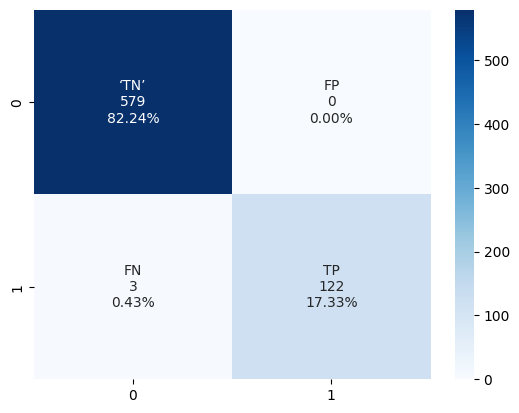

In [ ]:
#Confusion Matrix for Random Forest Classifier
group_names = ['‘TN’','FP','FN','TP']
group_counts_RF = ["{0:0.0f}".format(value) for value in
                cf_matrix_RF.flatten()]
group_percentages_RF = ["{0:.2%}".format(value) for value in
                     cf_matrix_RF.flatten()/np.sum(cf_matrix_RF)]
labels_RF = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts_RF, group_percentages_RF)]
labels_RF = np.asarray(labels_RF).reshape(2,2)
sns.heatmap(cf_matrix_RF, annot=labels_RF, fmt='', cmap='Blues')

In [ ]:
df_feature_importance = pd.DataFrame([list(X_train.columns),
                                      RFC.feature_importances_],
                                     index=None,
                                     ).transpose().sort_values(
                                         1, ascending=False).rename(
                                             columns=dict(
                                                 zip([0, 1], ["Features",
                                                              "Importance"])
                                             )
                                         )
df_feature_importance

,Features,Importance
8,Minimum Orbit Intersection,0.462699
1,Est Dia in M(min),0.134733
2,Est Dia in M(max),0.130529
0,Absolute Magnitude,0.129082
13,Perihelion Distance,0.04788
6,Orbit ID,0.032292
7,Orbit Uncertainity,0.015642
11,Inclination,0.012597
4,Relative Velocity km per hr,0.010398
5,Miss Dist.(kilometers),0.005146


Text(0.5, 1.0, 'Feature Importances of Random Forest Classifier')

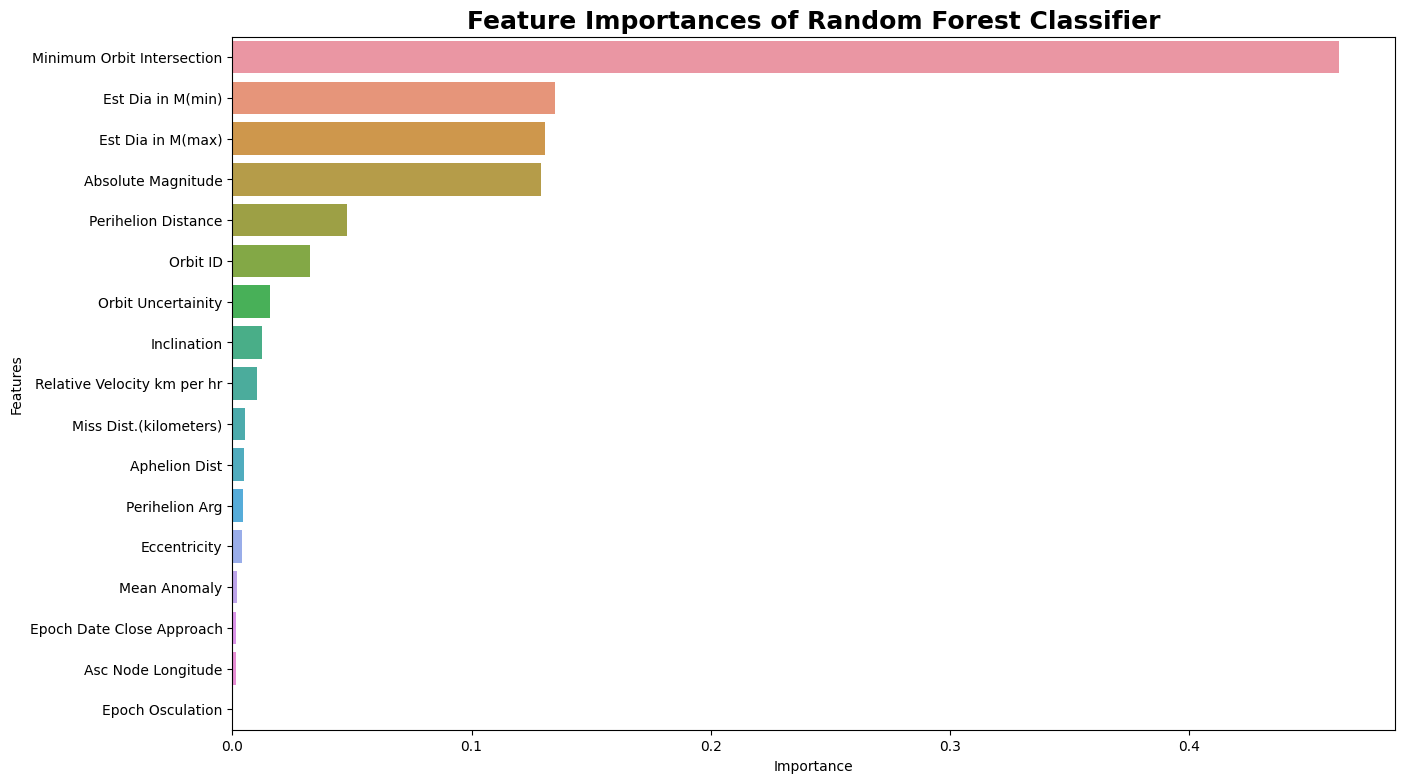

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9))
sns.barplot(df_feature_importance, x="Importance", y="Features", ax=ax)
ax.set_title("Feature Importances of Random Forest Classifier",
             fontweight="bold", fontsize=18)